In [6]:
import numpy as np
import scipy.io.wavfile as sio

a = sio.read("../DAE-libri/176.wav")[1].astype(np.float32)
b = sio.read("../DAE-libri/176.wav.gsm.wav")[1].astype(np.float32)
a /= 2**15
b /= 2**15

In [11]:
window = np.sqrt(np.hamming(512))

a_stft = np.zeros([1197, 257])
for time in range(1197):
    win = a[128 * time : 128 * time + 512]
    if len(win) != 512:
        break
    fft = np.fft.rfft(window * win) / 512
    a_stft[time, :] = -np.log(np.abs(fft) ** 2 + 2e-12)

b_stft = np.zeros([1197, 257])
for time in range(1197):
    win = b[128 * time : 128 * time + 512]
    if len(win) != 512:
        break
    fft = np.fft.rfft(window * win) / 512
    b_stft[time, :] = -np.log(np.abs(fft) ** 2 + 2e-12)


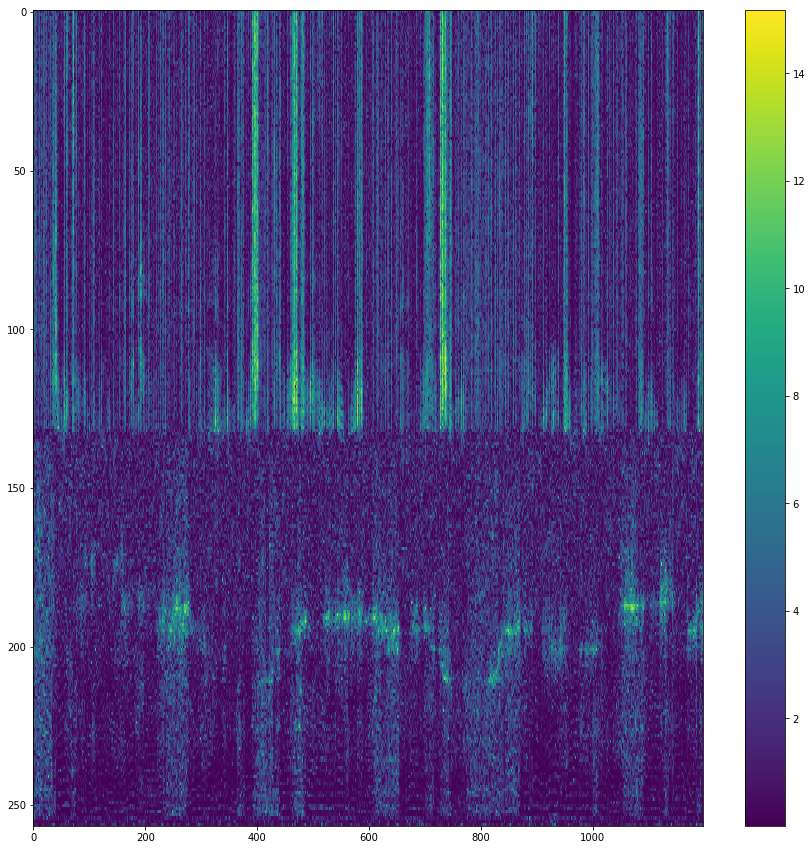

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.imshow(np.rot90(np.abs(a_stft - b_stft)), aspect='auto')
plt.colorbar()
plt.show()